In [5]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

In [2]:
data = pd.read_csv("Amazon Books.csv")
data.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [3]:
data.shape

(550, 7)

There are seven features and 550 observations in this dataset

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


The datatypes are correct. With no null values in any columns.

In [120]:
# Let's try to understand year-wise number of ratings given
yearly_ratings = data.groupby(data['Year']).sum()
yearly_ratings

,User Rating,Reviews,Price
Year,,,
2009,229.2,235506,770
2010,227.9,273981,674
2011,227.9,405041,755
2012,226.6,654546,765
2013,227.7,654907,730
2014,231.1,792997,732
2015,232.4,711669,521
2016,233.9,709800,659
2017,233.0,644420,569


<AxesSubplot:>

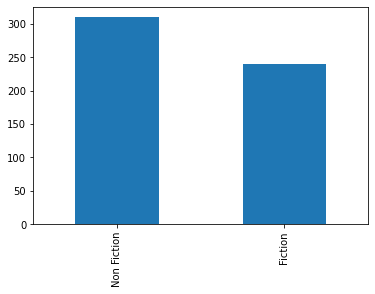

In [111]:
# Breakdown by Genre
data['Genre'].value_counts().plot(kind='bar')

In [10]:
# User rating by year 
px.bar(data,x='Year',y='User Rating', barmode='group', color='Genre' ,title='Ratings by year and Genre')

Except in the year 2014 the Non-Fiction genre has outperformed Fiction movies.

In [20]:
# Let's see the top 10 ratings with few of its features
data[['Name','Author','User Rating','Genre']].groupby(by=['Author','Name','Genre']).mean().sort_values(by=['User Rating'],ascending=False).head(10)

,,,User Rating
Author,Name,Genre,
J. K. Rowling,"Harry Potter and the Goblet of Fire: The Illustrated Edition (Harry Potter, Book 4) (4)",Fiction,4.9
Dav Pilkey,Dog Man: A Tale of Two Kitties: From the Creator of Captain Underpants (Dog Man #3),Fiction,4.9
J.K. Rowling,"Harry Potter and the Sorcerer's Stone: The Illustrated Edition (Harry Potter, Book 1)",Fiction,4.9
Brandon Stanton,Humans of New York : Stories,Non Fiction,4.9
J.K. Rowling,"Harry Potter and the Prisoner of Azkaban: The Illustrated Edition (Harry Potter, Book 3)",Fiction,4.9
Bill Martin Jr.,"Brown Bear, Brown Bear, What Do You See?",Fiction,4.9
Emily Winfield Martin,The Wonderful Things You Will Be,Fiction,4.9
J.K. Rowling,"Harry Potter and the Chamber of Secrets: The Illustrated Edition (Harry Potter, Book 2)",Fiction,4.9
Rush Limbaugh,Rush Revere and the Brave Pilgrims: Time-Travel Adventures with Exceptional Americans (1),Fiction,4.9


Surprisingly out of the top 10 Rated books 9 are from fiction genre and only 1 belongs to Non Fiction category

In [61]:
# Top authors
data[['Author','User Rating']].groupby('Author').mean().sort_values(by='User Rating',ascending=False).head(10)

,User Rating
Author,
Jill Twiss,4.9
Nathan W. Pyle,4.9
Chip Gaines,4.9
Rush Limbaugh,4.9
Bill Martin Jr.,4.9
Emily Winfield Martin,4.9
Pete Souza,4.9
Patrick Thorpe,4.9
Lin-Manuel Miranda,4.9


In [81]:
# Top 10 selling book
data[['Name','User Rating','Year']].groupby(by='Name').mean().sort_values(by='User Rating',ascending=False).head(5)

,User Rating,Year
Name,,
Hamilton: The Revolution,4.9,2016.0
Rush Revere and the First Patriots: Time-Travel Adventures With Exceptional Americans (2),4.9,2014.0
"Harry Potter and the Sorcerer's Stone: The Illustrated Edition (Harry Potter, Book 1)",4.9,2016.0
"Harry Potter and the Prisoner of Azkaban: The Illustrated Edition (Harry Potter, Book 3)",4.9,2017.0
"Harry Potter and the Goblet of Fire: The Illustrated Edition (Harry Potter, Book 4) (4)",4.9,2019.0


Three of the top five books sold were from the series of Harry Potter

In [71]:
# Top rated books every year
data[['Name','User Rating','Year']].groupby(by='Year').max().sort_values(by='Year',ascending=True).head(20)

,Name,User Rating
Year,,
2009,Where the Wild Things Are,4.8
2010,Women Food and God: An Unexpected Path to Almo...,4.8
2011,What to Expect When You're Expecting,4.9
2012,Winter of the World: Book Two of the Century T...,4.9
2013,Wonder,4.9
2014,Wonder,4.9
2015,Wonder,4.9
2016,You Are a Badass: How to Stop Doubting Your Gr...,4.9
2017,You Are a Badass: How to Stop Doubting Your Gr...,4.9


<AxesSubplot:>

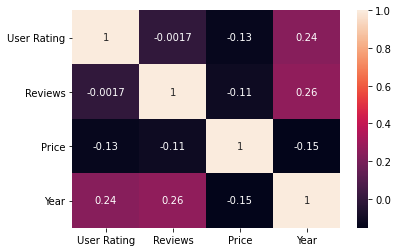

In [84]:
sns.heatmap(data.corr(),annot=True)

In [86]:
# Relation between rating and price
px.bar(data,x='User Rating', y='Price')

The ratings are linearly related to price from 4.1 to 4.8

Let us check the number of 4.9 rated books as the price is relatively lower as compared to other highly rated books

In [102]:
data['User Rating'].value_counts()

4.8    127
4.7    108
4.6    105
4.5     60
4.9     52
4.4     38
4.3     25
4.0     14
4.2      8
4.1      6
3.9      3
3.8      2
3.3      1
3.6      1
Name: User Rating, dtype: int64

As suspected the number of books with 4.9 rated are very low which imacted the price rates